In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve


In [2]:
df = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI_Collection_and_Loss_Reverse_Forecast\modelling\nasabah\clustering\data\data_for_classification.csv")
df.sample(5)

,Unnamed: 0,net_income,loan_amount,amount_of_late,late_payment_amount,credit_score,arrears_amounts,loss_reverse,credit_risk
475,475,15500000.0,67166667.0,82.0,6.0,248.0,1.0,16791667.0,Tertagih dengan resiko rendah
3574,3574,16500000.0,52000000.0,141.0,8.0,297.0,2.0,26000000.0,Tertagih dengan resiko tinggi
2637,2637,19000000.0,46500000.0,174.0,10.0,239.0,4.0,46500000.0,Tertagih dengan resiko tinggi
3327,3327,19000000.0,68833333.0,35.0,3.0,434.0,1.0,17208333.0,Tertagih dengan resiko rendah
3375,3375,13000000.0,62666667.0,17.0,1.0,391.0,1.0,15666667.0,Tertagih dengan resiko rendah


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           5000 non-null   int64  
 1   net_income           5000 non-null   float64
 2   loan_amount          5000 non-null   float64
 3   amount_of_late       5000 non-null   float64
 4   late_payment_amount  5000 non-null   float64
 5   credit_score         5000 non-null   float64
 6   arrears_amounts      5000 non-null   float64
 7   loss_reverse         5000 non-null   float64
 8   credit_risk          5000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 351.7+ KB


In [4]:
for i in df.columns:
    if df[i].dtype == "object":
        df[i] = df[i].astype("category")

df.drop(["Unnamed: 0", "amount_of_late", "loss_reverse"], axis=1, inplace=True)

In [5]:
columns = {}
for i in df.columns:
    if df[i].dtype == "category" or df[i].dtype == "object":
        columns[i] = LabelEncoder().fit(df[i])
        df[i] = columns[i].transform(df[i])
             
scaler = RobustScaler().fit(df[[i for i in df.columns if i not in columns]])
df2 = pd.DataFrame(scaler.transform(df[[i for i in df.columns if i not in columns]]), columns=df[[i for i in df.columns if i not in columns]].columns)
for i in columns:
    df2[i] = df[i]
df2.head(5)

,net_income,loan_amount,late_payment_amount,credit_score,arrears_amounts,credit_risk
0,0.000000,0.190476,-0.6,1.589041,-1.0,0
1,0.266667,0.984127,-0.2,0.365297,0.0,0
2,0.266667,-0.111111,-0.8,0.835616,-1.0,0
3,0.000000,0.063492,0.2,0.849315,0.0,0
4,-0.906667,-0.412698,-0.4,0.223744,-1.0,0


In [6]:
X = df2.drop("credit_risk", axis=1)
y = df2["credit_risk"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 5), (1000, 5), (4000,), (1000,))

In [7]:
model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, ccp_alpha=0.0, class_weight="balanced", random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, min_samples_leaf=5,
                       random_state=0)

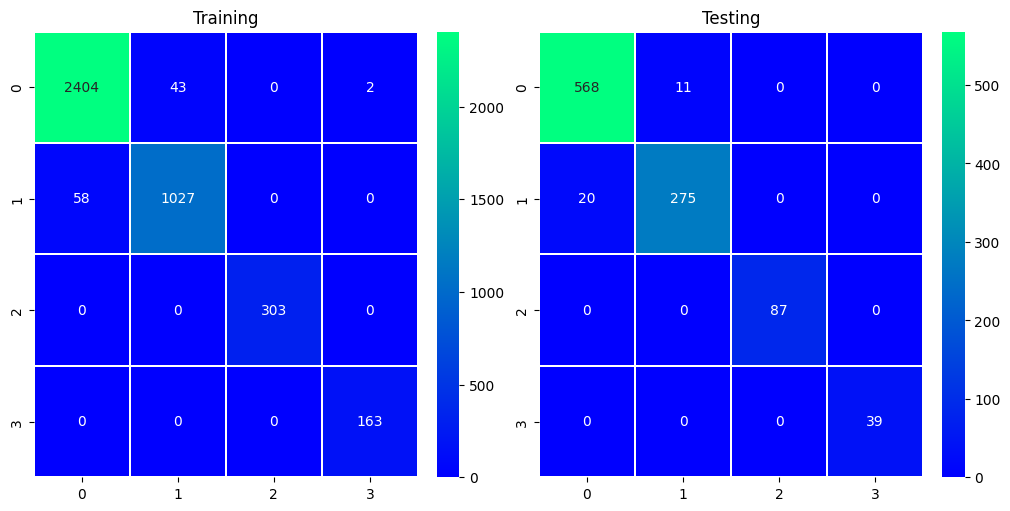

In [8]:
y_pred = model.predict(X_test)
fig, ax = plt.subplots(1, 2, figsize=(10, 5), layout="constrained")
sns.heatmap(confusion_matrix(y_train, model.predict(X_train)), fmt="d", annot=True, linecolor="white", linewidths=0.2, cmap="winter", ax=ax[0])
sns.heatmap(confusion_matrix(y_test, y_pred), fmt="d", annot=True, linecolor="white", linewidths=0.2, cmap="winter", ax=ax[1])

ax[0].set_title("Training")
ax[1].set_title("Testing")
plt.show()

In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       579
           1       0.96      0.93      0.95       295
           2       1.00      1.00      1.00        87
           3       1.00      1.00      1.00        39

    accuracy                           0.97      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.97      0.97      0.97      1000



In [10]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2449
           1       0.96      0.95      0.95      1085
           2       1.00      1.00      1.00       303
           3       0.99      1.00      0.99       163

    accuracy                           0.97      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.97      0.97      0.97      4000



In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

print(f"""
      Accuracy        : {accuracy*100:.2f}%
      Precision Score : {precision*100:.2f}%
      Recall Score    : {recall*100:.2f}%
      F1 Score        : {f1*100:.2f}%
      """)


      Accuracy        : 96.90%
      Precision Score : 98.19%
      Recall Score    : 97.83%
      F1 Score        : 98.00%
      


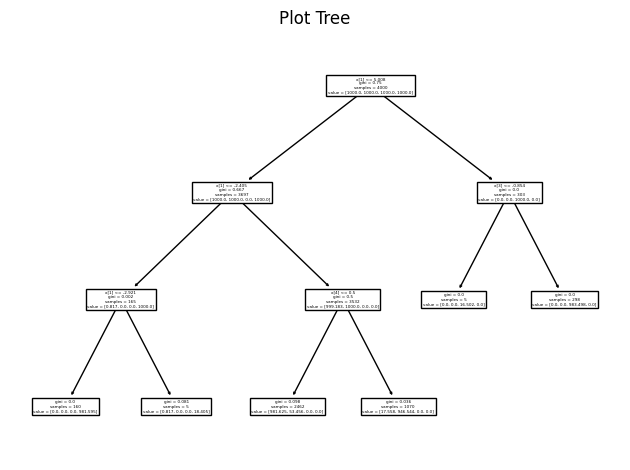

In [12]:
from sklearn.tree import plot_tree

plot_tree(model)
plt.title("Plot Tree")
plt.tight_layout()
plt.show()

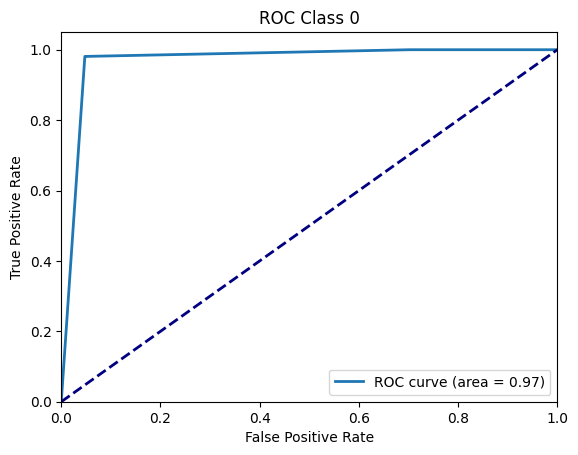

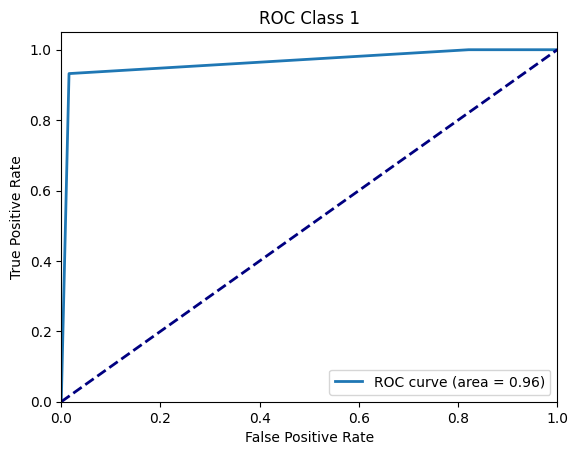

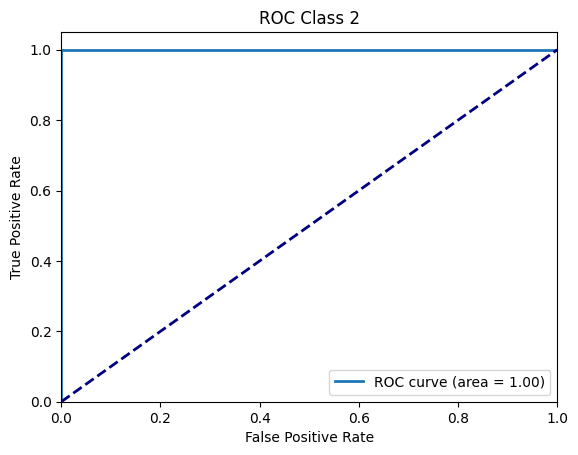

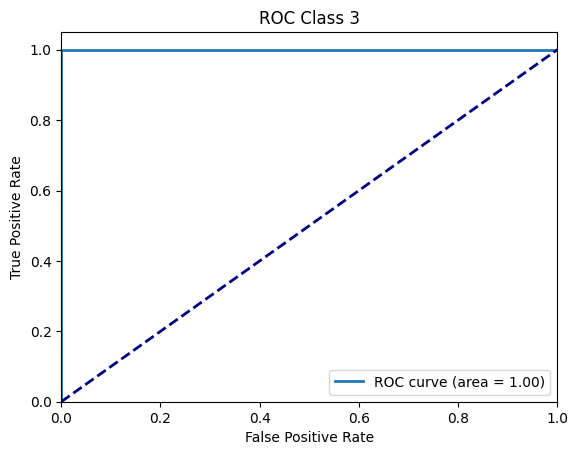

Macro-Averaged ROC AUC: 0.98


In [13]:
# Convert y_test to binary format for each class
n_classes = 4  # Number of classes
y_binary = np.zeros((len(y_test), n_classes))
y_prob = model.predict_proba(X_test)
for i in range(n_classes):
    y_binary[:, i] = (y_test == i).astype(int)

# Calculate ROC AUC for each class
roc_auc_list = []
for i in range(n_classes):
    roc_auc = roc_auc_score(y_binary[:, i], y_prob[:, i])
    roc_auc_list.append(roc_auc)

    # Calculate ROC curve for each class
    fpr, tpr, _ = roc_curve(y_binary[:, i], y_prob[:, i])

    # Display ROC curve
    plt.figure()
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Class {i}')
    plt.legend(loc='lower right')
    plt.show()

# Display Macro-Averaged ROC AUC
print(f'Macro-Averaged ROC AUC: {sum(roc_auc_list) / n_classes:.2f}')

In [14]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

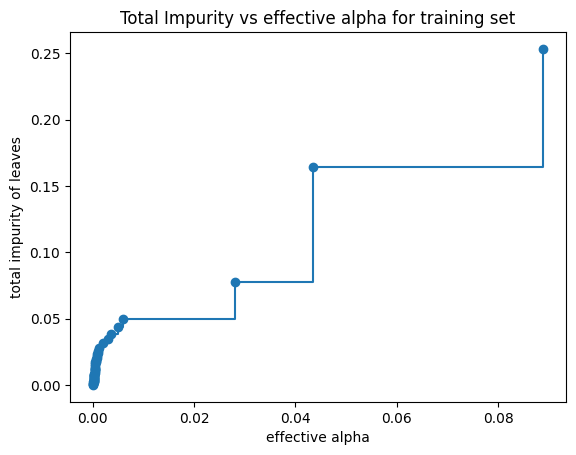

In [15]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [16]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2908983873448463


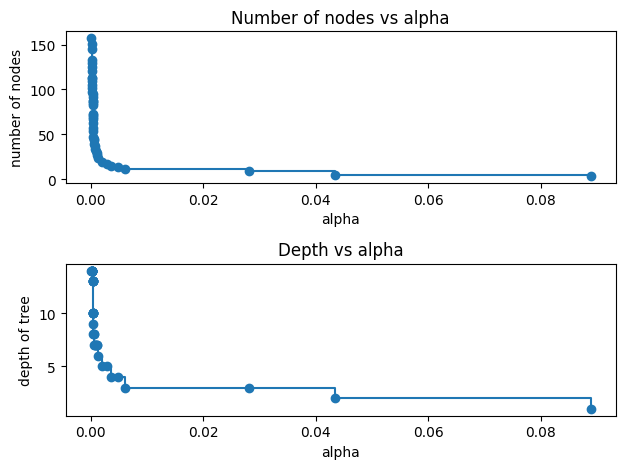

In [17]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [18]:
print(*depth)

14 14 14 14 14 14 14 14 14 14 14 14 14 13 13 13 13 13 13 10 10 10 10 10 10 9 8 8 8 7 7 7 7 7 7 6 5 5 4 4 3 3 2 1


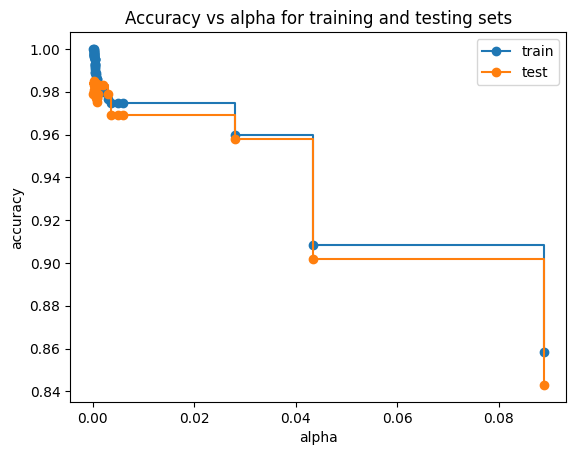

In [19]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()


In [20]:
# model = DecisionTreeClassifier(ccp_alpha=ccp_alphas[0], class_weight="balanced", random_state=0)
model = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alphas[-3], max_depth=3, min_samples_split=5)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.028125382293471564, max_depth=3,
                       min_samples_split=5, random_state=0)

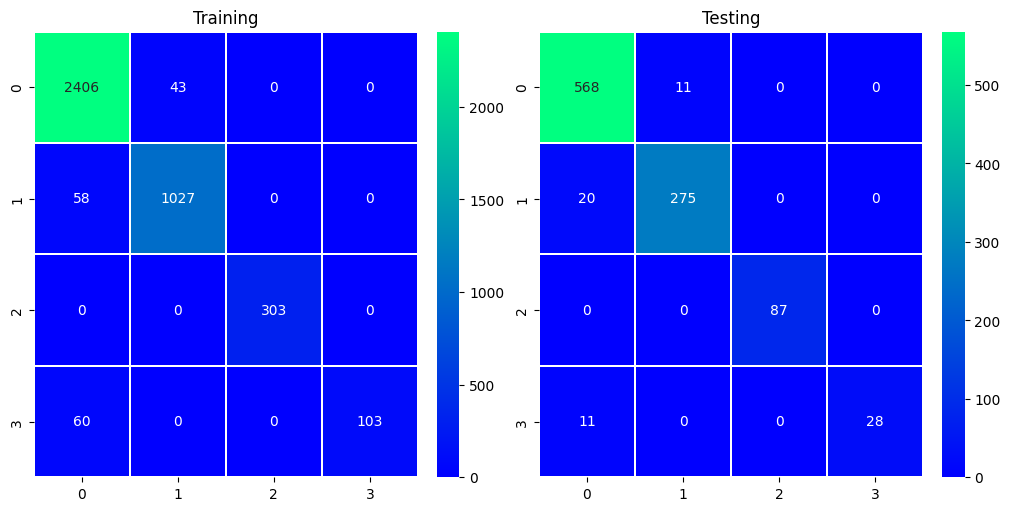

In [21]:
y_pred = model.predict(X_test)
fig, ax = plt.subplots(1, 2, figsize=(10, 5), layout="constrained")
sns.heatmap(confusion_matrix(y_train, model.predict(X_train)), fmt="d", annot=True, linecolor="white", linewidths=0.2, cmap="winter", ax=ax[0])
sns.heatmap(confusion_matrix(y_test, y_pred), fmt="d", annot=True, linecolor="white", linewidths=0.2, cmap="winter", ax=ax[1])

ax[0].set_title("Training")
ax[1].set_title("Testing")
plt.show()

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

print(f"""
      Accuracy        : {accuracy*100:.2f}%
      Precision Score : {precision*100:.2f}%
      Recall Score    : {recall*100:.2f}%
      F1 Score        : {f1*100:.2f}%
      """)


      Accuracy        : 95.80%
      Precision Score : 97.74%
      Recall Score    : 90.78%
      F1 Score        : 93.67%
      


In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       579
           1       0.96      0.93      0.95       295
           2       1.00      1.00      1.00        87
           3       1.00      0.72      0.84        39

    accuracy                           0.96      1000
   macro avg       0.98      0.91      0.94      1000
weighted avg       0.96      0.96      0.96      1000



In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       579
           1       0.96      0.93      0.95       295
           2       1.00      1.00      1.00        87
           3       1.00      0.72      0.84        39

    accuracy                           0.96      1000
   macro avg       0.98      0.91      0.94      1000
weighted avg       0.96      0.96      0.96      1000



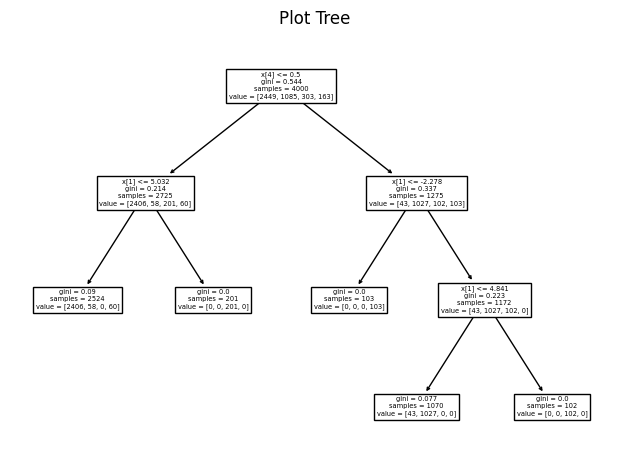

In [25]:
from sklearn.tree import plot_tree

plot_tree(model)
plt.title("Plot Tree")
plt.tight_layout()
plt.show()

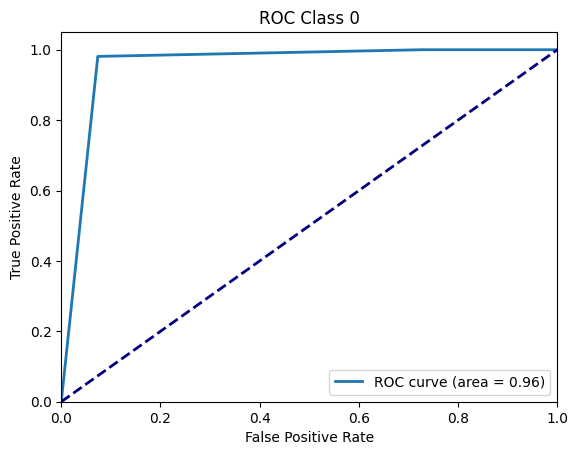

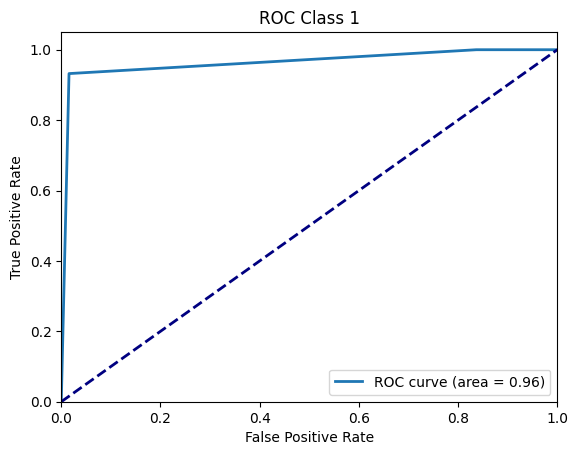

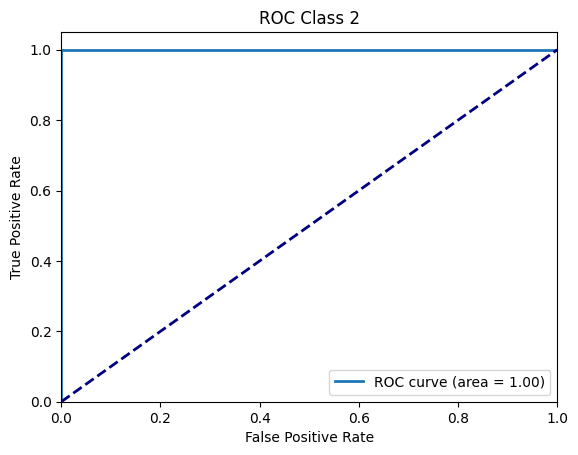

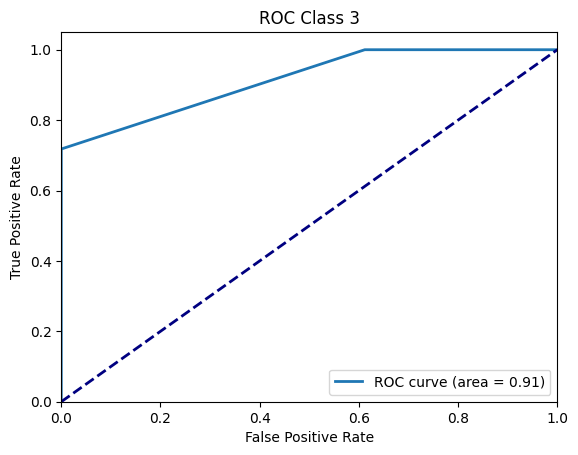

Macro-Averaged ROC AUC: 0.96


In [26]:
# Convert y_test to binary format for each class
n_classes = 4  # Number of classes
y_binary = np.zeros((len(y_test), n_classes))
y_prob = model.predict_proba(X_test)
for i in range(n_classes):
    y_binary[:, i] = (y_test == i).astype(int)

# Calculate ROC AUC for each class
roc_auc_list = []
for i in range(n_classes):
    roc_auc = roc_auc_score(y_binary[:, i], y_prob[:, i])
    roc_auc_list.append(roc_auc)

    # Calculate ROC curve for each class
    fpr, tpr, _ = roc_curve(y_binary[:, i], y_prob[:, i])

    # Display ROC curve
    plt.figure()
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Class {i}')
    plt.legend(loc='lower right')
    plt.show()

# Display Macro-Averaged ROC AUC
print(f'Macro-Averaged ROC AUC: {sum(roc_auc_list) / n_classes:.2f}')

In [27]:
import pickle, joblib

pickle.dump(model, open("tree.pkl", "wb"))

In [28]:
load_model = joblib.load('tree.pkl')

input_data = [x for x in X_test.iloc[-1]]
final_features = [np.array(input_data)]
result = load_model.predict(final_features)[0]
result

c:\Program Files\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0

In [29]:
y_test.iloc[-1]

0